$$
\newcommand{\mymat}[1]{
\left[
\begin{array}{rrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
#1
\end{array}
\right]
}
\newcommand{\myp}[1]{\left( #1 \right)}
\newcommand{\myb}[1]{\left[ #1 \right]}
\newcommand{\myv}[1]{\left< #1 \right>}
\newcommand{\mys}[1]{\left\{ #1 \right\}}
\newcommand{\myab}[1]{\left| #1 \right|}
\newcommand{\bx}{{\bf x}}
\newcommand{\by}{{\bf y}}
\newcommand{\bu}{{\bf u}}
\newcommand{\bv}{{\bf v}}
$$


#Lecture 2

***

<br>

##Dot Products

Last time we saw how we could add vectors together, multiply them by a scalar, and importantly, how we can form linear combinations of multiple vectors.  

We did not talk about multiplying one vector by another.  There is a way to do this, but it is not the conventional elementwise multiplication that you might expect.  

The **dot product** is an operation that takes two vectors, call them $\bu$ and $\bv$, and returns a scalar value (i.e. just a number).  

**def:** Let $\bu$ and $\bv$ be vectors in $\mathbb{R}^n$, then their **dot product**, written as $\bu \cdot \bv$, is given by  

<br>

$$
\bu \cdot \bv = 
\mymat{
u_1 \\
u_2 \\
\vdots \\
u_n 
} 
\cdot 
\mymat{
v_1 \\
v_2 \\
\vdots \\
v_n 
} = 
u_1v_1 + u_2v_2 + \cdots + u_nv_n
$$

<br>

The dot product of two vectors actually tells us a tremendous amount of information about their geometric relationship to one another, but we'll table that for later, and for now just it as a computational tool. 

###Example 1: 
Find $\bu \cdot \bv$ if $\bu = \mymat{1 \\ 2 \\ 3}$ and $\bv = \mymat{-2 \\ 4 \\ 1}$. 

We have 

<br>

$$
\mymat{1 \\ 2 \\ 3} \cdot \mymat{-2 \\ 4 \\ 1} = 1\myp{-2} + 2\myp{4} + 3\myp{1} = -2 + 8 + 3 = 9
$$

<br>

###Example 2: 
A street vendor sells $a$ hamburgers, $b$ hot dogs, and $c$ sodas on a given day.  He charges \$2 for a hamburger, \$1.50 for a hot dog, and \$1 for a soda.  If $\bu = \myp{a, b, c}$ and $\bv = \myp{2, 1.5, 1}$ then what does $\bu \cdot \bv$ represent? 

Computing the dog product we have 

<br>

$$
\bu \cdot \bv = \mymat{a \\ b \\ c} \cdot \mymat{2 \\ 1.5 \\1} = 2a + 1.5b + c = \textrm{Total Revenue for the Day}
$$

<br>



##Towards Solving Linear Systems

<br>

Consider the following system of two equations and two unknowns. 

<br>

$$
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
 2x_1 + x_2 &=& 5 
\end{array}
$$

<br>

This is called a *linear system* because the variables $x_1$ and $x_2$ only get multiplied by scalar values, not by each other. The *solution* to the system is the values of $x_1$ and $x_2$ that **make both equations true at the same time**.

One way to visualize the solution (at least in two dimensions) is the so-called **row view** of the system.  Look at each row of the system as an equation and plot the line that it  represents.  Keep in mind that we can treat $x_1$ like it's $x$ and $x_2$ like it's $y$.  Solving for $x_2$ in each case we have 

<br>

$$
\begin{array}{rcl}
 x_2 &=& x_1 -1 \\
 x_2 &=& -2x_1 + 5
\end{array}
$$

<br>

Plotting these as lines gives us 

In [6]:
using PyPlot

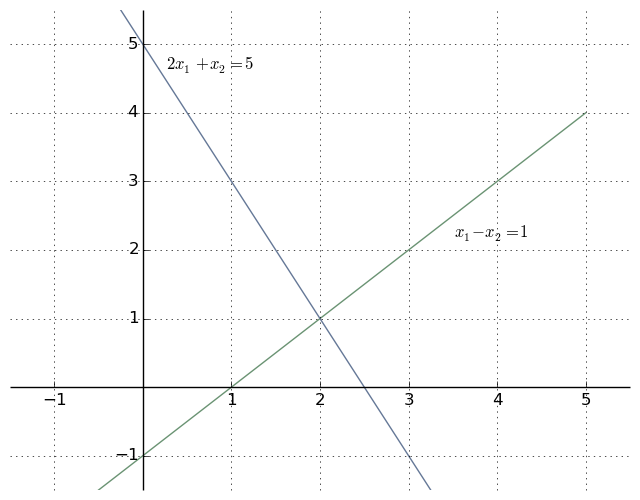

In [12]:
mycolors = {"green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897"}
x = linspace(-1,5,50)
ax = gca()
ax[:plot](x, x -1, color=mycolors["green"])
ax[:plot](x, 5 -2*x, color=mycolors["blue"])
figtext(.32,.80, L"2x_1 + x_2 = 5");
figtext(.68,.52, L"x_1 - x_2 = 1")
ax[:set_ylim]([-1.5,5.5])
ax[:set_xlim]([-1.5,5.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3, 4, 5],)
xticks([-1, 1, 2, 3, 4, 5],)
margins(0.5);

The point where the lines intersect is the solution.  Any point on a given line is a point that satisfies the associated equation, but the only point that satisfies **both** equations is the point of intersection. 

OK, that's one way to visualize the solution to a system of two equations and two unknowns, but let's look at a more linear-algebra-ee picture.  Notice that we can rearrange the form of the system based on vectors. 

<br>

$$
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
 2x_1 + x_2 &=& 5 
\end{array}  
\quad \Rightarrow \quad 
x_1 \mymat{1 \\ 2} + x_2\mymat{-1 \\ 1} = \mymat{1 \\ 5} = {\bf b}
$$

<br>

Note that the problem now can be rephrased as:

$\hspace{8mm}$*What linear combination of the the vectors* $\mymat{1\\ 2}$ *and* $\mymat{-1 \\ 1}$ *gives the vector* $\mymat{5 \\ 1}$.  

The coefficients of the linear combination are the $x_1$ and $x_2$ and thus the unknowns that we're solving for.  This is what the book calls the **column view** of a linear system, and is generally more useful from a linear algebra perspective, especially when we get to higher dimensions when we can no longer easily draw things. 

Let's see if we can solve this graphically as well. 

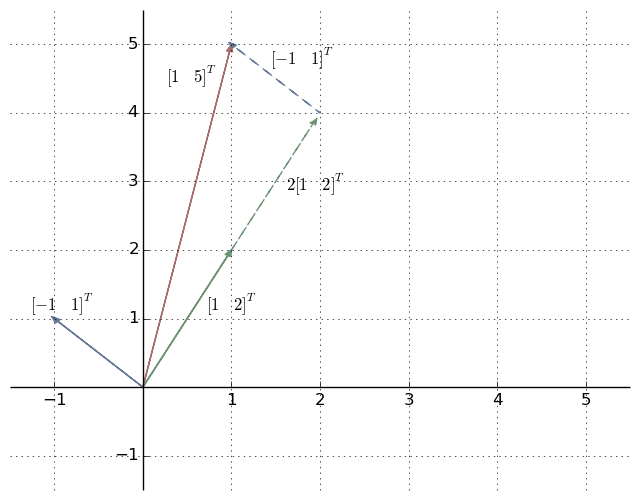

In [64]:
u = [1;2]
v = [-1;1]
b = [1;5]
upv = u+v
sf = 0.96
arrow(0, 0, sf*u[1], sf*u[2], head_width=0.07, head_length=0.1, fc=mycolors["green"], ec=mycolors["green"])
figtext(.37,.40, L"[1 \hspace{1.0} 2]^T");
arrow(0, 0, sf*v[1], sf*v[2], head_width=0.07, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.15,.40, L"[-1 \hspace{1.0} 1]^T");
arrow(0, 0, 1.02*sf*b[1], 1.02*sf*b[2], head_width=0.07, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.32,.78, L"[1 \hspace{1.0} 5]^T");
arrow(0, 0, 2*sf*u[1], 2*sf*u[2], head_width=0.07, head_length=0.1, 
fc=mycolors["green"], ec=mycolors["green"], ls="dashed")
figtext(.47,.60, L"2[1 \hspace{1.0} 2]^T");
arrow(2, 4, sf*v[1], sf*v[2], head_width=0.07, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"], ls="dashed")
figtext(.45,.81, L"[-1 \hspace{1.0} 1]^T");
ax = gca()
ax[:set_ylim]([-1.5,5.5])
ax[:set_xlim]([-1.5,5.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3, 4, 5],)
xticks([-1, 1, 2, 3, 4, 5],)
margins(0.3);

Note that the solution is again $x_1 = 2$ and $x_2 = 1$.  

The notation is a little clunky writing linear systems of equations as linear combinations.  This clunkiness is the main motivation for the creation of the **matrix**. 

We rewrite the column view of the system as follows 

<br>

$$
x_1 \mymat{1 \\ 2} + x_2\mymat{-1 \\ 1} = \mymat{1 \\ 5} =
\quad \Rightarrow \quad 
\mymat{
1 & -1 \\ 
2 &  1
}
\mymat{
x_1 \\
x_2 
} = 
\mymat{
1 \\ 
5
}
\quad \Rightarrow \quad  A\bx = {\bf b} \quad
\quad \quad \textrm{The Matrix Equation}
$$

<br>

* $A$ is called the *coefficient matrix*
* $\bx$ is called the *unknown vector* or just the *unknown*
* ${\bf b}$ is called the *right-hand side vector*

Note that we can talk about the *size* of a matrix just like we do with a vector.  But now we have to describe how many rows it has and how many columns it has.  In general a matrix that has $m$ rows and $n$ columns we say has size or *dimension* $m \times n$.  So the matrix $A$ in the example above has dimension $2 \times 2$. 

Notation-wise, if we want to talk about a general matrix $A$, we write it's entries as lower-case letters with a subscript indicating which row the element is in, and then which column.  A general $2 \times 2$ matrix $A$ can be written as 

<br>

$$
A = 
\mymat{a_{11} & a_{12} \\ a_{21} & a_{22}}
$$

<br>

The syntax for accessing the elements of a matrix in Matlab and Julia are similar, except we don't use a lowercase letter.  If you have a matrix variable `A` in Matlab you access the entry in the second row and first column as `A(2,1)`.  In Julia we use square brackets instead of parentheses, e.g. `A[2,1]`. 

OK, so what does this new matrix equation actually **mean**?  Notice that it has the form 

<br>

$$
\textbf{Matrix} \quad \textrm{(times)} \quad \textbf{vector} \quad \textrm{(equals)} \quad \textbf{vector}
$$

<br>

The meaning of the matrix equation should be clear because we know where it came from. Let's just look at the left-hand side of the equation, $A\bx$. For an arbitrary $2 \times 2$ system we have

<br>

$$
A\bx = 
\mymat{a_{11} & a_{12} \\ a_{21} & a_{22}}
\mymat{x_1 \\ x_2}= 
x_1 \mymat{a_{11} \\ a_{12}} + x_2 \mymat{a_{12} \\ a_{22}}
$$

<br>

If we interpret $A\bx$ as the *multiplication* of matrix $A$ with vector $\bx$ then we can deduce from the above expression how matrix-vector multiplication works. You form the linear combination of the columns of $A$ where the coefficients are the appropriate entries in the vector $\bx$.  

###Example 3 

Find $A\bx$ for $A = \mymat{1 & 2 \\ 3 & 4}$ and $\bx = \mymat{-1 \\ 3}$

<br>

$$
A\bx = 
\mymat{1 & 2 \\ 3 & 4}
\mymat{-1 \\ 3} = 
-1\mymat{1 \\ 3} + 3\mymat{2 \\ 4} = 
\mymat{-1 \\ -3} + \mymat{6 \\ 12} = 
\mymat{5 \\ 9}
$$

<br>

Another way to view multiplication of a matrix and a vector comes from the row view of a linear system.  Recall that in the linear system example above we had 

<br>

$$
\begin{array}{r}
~x_1 - x_2 \\ 
2x_1 + x_2 
\end{array}
\quad \Leftrightarrow \quad
\mymat{1 & -1 \\ 2 & 1 }
\mymat{x_1 \\ x_2} 
$$

<br>

If we do one row at a time the 1 in position $a_{11}$ multiplies $x_1$ and the -1 in the $a_{12}$ position multiplies $x_2$, and then we add the results together.  Similarly to get the second row of the linear system the 2 in the $a_{21}$ position multiplies $x_1$ and the 1 in the $a_{22}$ position multiplies $x_2$, and we add the results together. 

###Example 4 

Find $A\bx$ for $A = \mymat{1 & 2 \\ 3 & 4}$ and $\bx = \mymat{-1 \\ 3}$

<br>

$$
A\bx = 
\mymat{1 & 2 \\ 3 & 4}
\mymat{-1 \\ 3} = 
\mymat{1(-1) + 2(3) \\ 3(-1) + 4(3)} = 
\mymat{5 \\ 9}
$$

<br>

The computation used to compute each element of the resulting vector $A\bx$ should look familiar to you.  It's exactly a dot product of a row of $A$ with the vector $\bx$. In general we can write 

<br> 

$$
A\bx = 
\mymat{
\textrm{row(1)} \cdot \bx \\
\textrm{row(2)} \cdot \bx \\
\vdots \hspace{3mm} \\
\textrm{row(n)} \cdot \bx
}
$$

<br>

Let's look at a system with three equations and three unknowns. Consider 

<br>

$$
\begin{array}{rcl}
x_1 + 2 x_2 + 3x_3 &=& 6 \\ 
2x_1 + 5x_2 + 2x_3 &=& 4 \\
6x_1 - 3x_2 + x_3 &=& 2 
\end{array}
$$

<br>

Just by inspection, we can see that the solution to the linear system is $x_1 = 0$, $x_2 = 0$, $x_3 = 2$, or $\bx = \mymat{0 \\ 0 \\ 2}$. 

In the *row view* of a system with three equations and three unknowns, each row represents a plane in three dimensional space.  The solution is the point in three dimensional space that lies on all three planes simultaneously (i.e. the intersection point).  I will spare you attempting to draw this in class, but you can look in your textbook for nice computer generated drawings.   

The *column view* is exactly the same as the in the two dimensional case.  We seek the unknown coefficients $x_1$, $x_2$, and $x_3$ that make the following linear combination true 

<br>

$$
x_1 \mymat{1 \\ 2 \\ 6} + 
x_2 \mymat{2 \\ 5 \\ -3} + 
x_3 \mymat{3 \\ 2 \\ 1} = 
\mymat{6 \\ 4 \\ 2}
$$

<br>

The associated matrix equation is as follows 

<br>

$$
\mymat{1 & 2 & 3 \\
2 & 5 & 2 \\
6 & -3 & 1}
\mymat{
x_1 \\
x_2 \\
x_3 
} = 
\mymat{6 \\ 4 \\ 2} \quad \Rightarrow \quad A\bx = {\bf b}
$$

<br>

###Example 5 

Find $A\bx$ for $A = \mymat{1 & 2 & 3 \\ 2 & 5 & 2 \\ 6 & -3 & 1}$ and $\bx = \mymat{1 \\ 2 \\ 1}$

<br>

The column view method for this problem is 

<br>

$$
\mymat{1 & 2 & 3 \\ 2 & 5 & 2 \\ 6 & -3 & 1} \mymat{1 \\ 2 \\ 1} = 
1 \mymat{1 \\ 2 \\ 6} + 
2 \mymat{2 \\ 5 \\ -3} + 
1 \mymat{3 \\ 2 \\ 1}
= 
\mymat{1 \\ 2 \\ 6} + 
\mymat{4 \\ 10 \\ -6} + 
\mymat{3 \\ 2 \\ 1} = 
\mymat{8 \\ 14 \\ 1}
$$

<br>

The row view looks like 

<br>

$$
\mymat{1 & 2 & 3 \\ 2 & 5 & 2 \\ 6 & -3 & 1} \mymat{1 \\ 2 \\ 1} = 
\mymat{
1(1) + 2(2) + 3(1) \\
2(1) + 5(2) + 2(1) \\
6(1)  -3(2) + 1(1) 
} = 
\mymat{
8 \\ 14 \\ 1
}
$$

<br> 

One of the most common and important matrices in linear algebra is called the **identity matrix**.  It is the matrix that has all 1's on the diagonal of the matrix, and zeros everywhere else.  The $3 \times 3$ identity matrix looks like 

<br>

$$
I = \mymat{1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1}
$$

<br>

Let's see what happens when we multiply $I$ by a vector.  Consider 

<br>

$$
\mymat{1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1}
\mymat{4 \\ 5 \\ 6} = 
\mymat{4 \\ 5 \\ 6}
$$

<br> 

So multiplying the the identity matrix by a vector just gives you the original vector back.  

##Implementation of Matrix-Vector Multiplication

Which form of multiplication that you choose to use on paper is mostly inconsequential.  I prefer to use the linear combination method because I prefer the column view of linear systems, but at the end of the day it doesn't matter.  **However** how you implement matrix-vector multiplication on a computer can have very large performance consequences.  You will explore this in a future homework assignment, but the gist of the problem lies in how the data in the matrix is stored on the computer and in what order the data is accessed in the implementation of matrix vector multiplication. 

###The Idea of Elimination 

Here we talk about the systematic idea behind the solution of linear systems.  We won't put anything in matrix form yet, but instead concentrate on the row view and the resulting pictures.  

Consider again the first example of a linear system: 

<br>

$$
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
 2x_1 + x_2 &=& 5 
\end{array}
$$

<br>

One way that you might have learned to solve small systems of equations in high-school is to add a particular scalar multiple of a row of the system to another row in order to eliminate one of the variables. For the given example, we might use the $x_1$ element in the first row to eliminate the $x_1$ element in the second row.  To do this we multiply the first row by 2 and subract it from the second row. 

<br>

$$
\textbf{Before} \quad
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
 2x_1 + x_2 &=& 5 
\end{array}
\quad \quad
\textbf{After} \quad
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
   3x_2 &=& 3 
\end{array}
\quad\quad
\begin{array}{l}
\textit{(multiply equation $1$ by $2$)} \\
\textit{(subtract to eliminate $2x_1$)}
\end{array}
$$

<br>

Notice that now we can immediately tell from the second equation that the value of $x_2$ must be $1$. Now that we know the value of $x_2$ we can plug it back into the first equation to solve for $x_1$. This gives us 

<br>

$$
x_1 - 1 = 1 \quad \Rightarrow \quad x_1 = 2
$$

<br>

and the final solution is $x_1 = 2$ and $x_2 = 1$, or $\bx = \mymat{2 \\ 1}$. 

Note that the solution process has two steps 

1. Elimination produces an **upper triangular system**.
2. The system is solved from the bottom upwards.  This process is called **back substitution**.

The elimination and back substitution processes work because adding a multiple of one row to another does not change the solution of the system. Think about it.  If $x_1$ and $x_2$ solve each of the equations (in other words, plugging in the value for $x_1$ and $x_2$ makes each side of the equation equal), then adding one row, or one multiple of a row, to another shouldn't change that.  

Let's see what happens to the geometry when we do this.  This time we'll plot the rows for the old system and the new system side-by-side. 

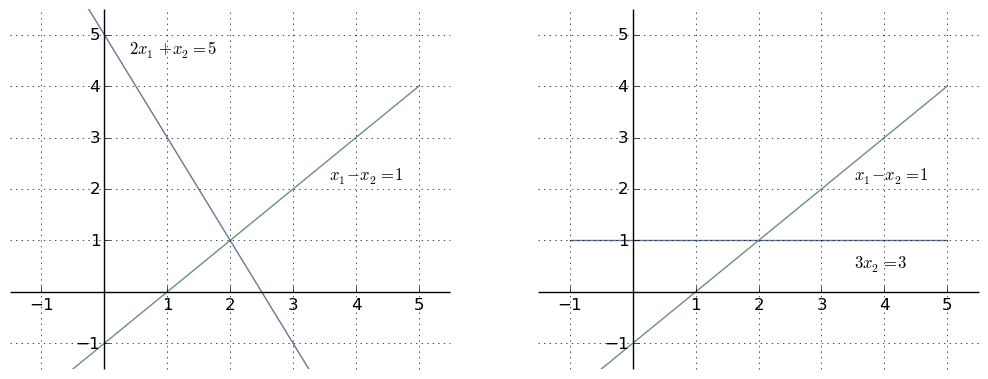

In [25]:
mycolors = {"green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897"}
x = linspace(-1,5,50)
subplot(121)
ax = gca()
ax[:plot](x, x -1, color=mycolors["green"])
ax[:plot](x, 5 -2*x, color=mycolors["blue"])
figtext(.22,.80, L"2x_1 + x_2 = 5");
figtext(.38,.52, L"x_1 - x_2 = 1")
ax[:set_ylim]([-1.5,5.5])
ax[:set_xlim]([-1.5,5.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3, 4, 5],)
xticks([-1, 1, 2, 3, 4, 5],)
margins(0.5);
subplot(122)
ax = gca()
ax[:plot](x, x -1, color=mycolors["green"])
ax[:plot](x, ones(length(x)), color=mycolors["blue"])
figtext(.80,.325, L"3x_2 = 3");
figtext(.80,.52, L"x_1 - x_2 = 1")
ax[:set_ylim]([-1.5,5.5])
ax[:set_xlim]([-1.5,5.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3, 4, 5],)
xticks([-1, 1, 2, 3, 4, 5],)
margins(0.5);
fig = gcf(); fig[:set_size_inches](12.5, 4.5);

Notice that the blue line corresponding to the second equation is now horizontal, but the intersection of the lines (i.e. the solution) has not changed. 

Let's look at the mechanics of the elimination phase again. 

<br>

$$
\textbf{Before} \quad
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
 2x_1 + x_2 &=& 5 
\end{array}
\quad \quad
\textbf{After} \quad
\begin{array}{rcl}
 x_1 - x_2 &=& 1 \\
   3x_2 &=& 3 
\end{array}
\quad\quad
\begin{array}{l}
\textit{(multiply equation $1$ by $2$)} \\
\textit{(subtract to eliminate $2x_1$)}
\end{array}
$$

<br>

When we try to use the $x_1$ term in the first equation to elimate the $x_1$ term in the second equation, we had to multiply the first equation by 2 and subtract it from the second equation.  There are two important components here which have specific names.  

First, since we're using the 1 in front of $x_1$ in the first equation to eliminate the 2 in front of the $x_1$ in the second equation, we call the $1$ the **pivot**. 

Second, since we multiplied the first equation by 2 and subtracted it from the second equation, we call the number 2 the **multiplier**. 

Let's look at another example.  Consider the following 

<br>

$$
\textbf{Before} \quad
\begin{array}{rcl}
 4x_1 - 4x_2 &=& 4 \\
 2x_1 + x_2 &=& 5 
\end{array}
\quad \quad
\textbf{After} \quad
\begin{array}{rcl}
 4x_1 - 4x_2 &=& 4 \\
   3x_2 &=& 3 
\end{array}
\quad\quad
\begin{array}{l}
\textit{(multiply equation $1$ by $1/2$)} \\
\textit{(subtract to eliminate $2x_1$)}
\end{array}
$$

<br>

In this case the **pivot** is the 4 in front of the $x_1$ in row 1, and the multiplier is $1/2$.  

In general, we have the following definitions: 

* The **pivot** is the first nonzero in the row that does the elimination. 
* The **multiplier** is (entry to eliminate) divided by (pivot) 

###Breakdown of Elimination

Normally the elimination process produces the pivots that take us to the upper triangular form, and then back substitution takes care of the rest. But sometimes bad things can happen 

###Example 6 (permanent failure with no solution)

Consider the following system of equations 

<br>

$$
\textbf{Before} \quad
\begin{array}{rcl}
 2x_1 - x_2 &=& 1 \\
 6x_1 - 3x_2 &=& 9 
\end{array}
\quad \quad
\textbf{After} \quad
\begin{array}{rcl}
 2x_1 - x_2 &=& 1 \\
   {\bf 0} x_2 &=& 6 
\end{array}
\quad\quad
\begin{array}{l}
\textit{(multiply equation $1$ by $3$)} \\
\textit{(subtract to eliminate $6x_1$)}
\end{array}
$$

<br>

We immediately see the problem here.  There is no value we can choose for $x_2$ such that ${\bf 0} ~ x_2 = 6$.  This means that the system does not have a solution. 

From a linear algebraic perspective the problem is that there is a **zero** in the place that the second pivot should be.  Zero pivots are not allowed, since they don't allow us to solve for the variable in that row during the back substitution phase.  Sometimes this is correctable by a process called **pivoting**, but we'll talk about this later. 

Let's look at the geometric picture of this problem. 

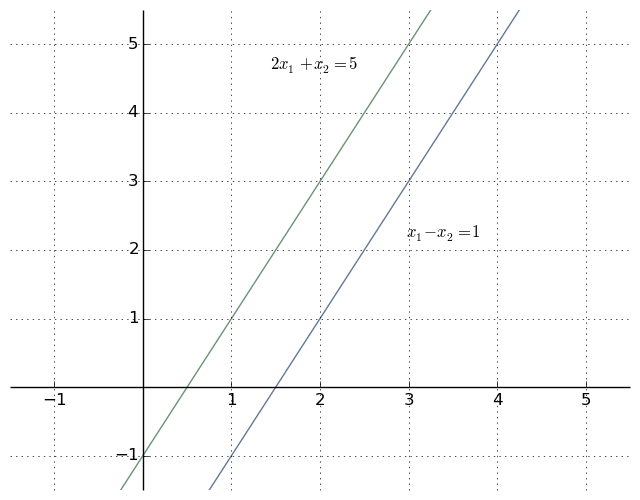

In [29]:
mycolors = {"green"=>"#6a9373","red"=>"#a76c6e","blue"=>"#657897"}
x = linspace(-1,5,50)
ax = gca()
ax[:plot](x, 2*x -1, color=mycolors["green"])
ax[:plot](x, 2*x - 3, color=mycolors["blue"])
figtext(.45,.80, L"2x_1 + x_2 = 5");
figtext(.62,.52, L"x_1 - x_2 = 1")
ax[:set_ylim]([-1.5,5.5])
ax[:set_xlim]([-1.5,5.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-1, 1, 2, 3, 4, 5],)
xticks([-1, 1, 2, 3, 4, 5],)
margins(0.5);

From the row picture it's pretty clear what the problem is.  The two lines that represent the rows are parallel, and never intersect.  Therefore there is no solution.  

The column view shows an alternate, but also interesting perspective.  The columns of the matrix that describes the original system are given by $\mymat{2 & 6}^T$ and $\mymat{-1 & -3}^T$.  If we plot these in the plane we have 

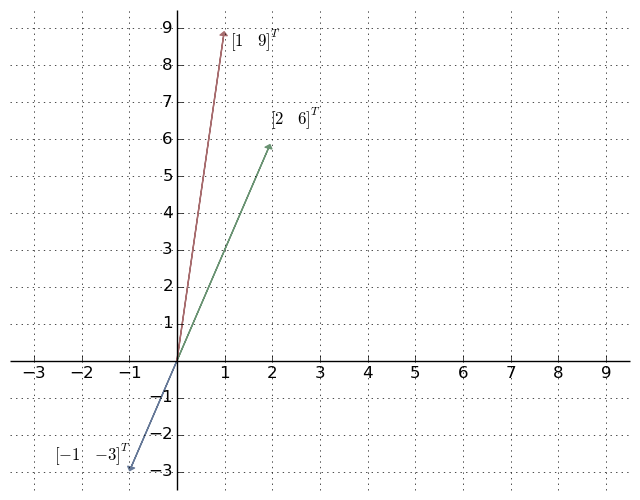

In [73]:
u = [2;6]
v = [-1;-3]
b = [1;9]
upv = u+v
sf = 0.96
arrow(0, 0, sf*u[1], sf*u[2], head_width=0.15, head_length=0.1, fc=mycolors["green"], ec=mycolors["green"])
figtext(.45,.71, L"[2 \hspace{1.0} 6]^T");
arrow(0, 0, sf*v[1], sf*v[2], head_width=0.15, head_length=0.1, fc=mycolors["blue"], ec=mycolors["blue"])
figtext(.40,.84, L"[1 \hspace{1.0} 9]^T");
arrow(0, 0, 1.02*sf*b[1], 1.02*sf*b[2], head_width=0.15, head_length=0.1, fc=mycolors["red"], ec=mycolors["red"])
figtext(.18,.15, L"[-1 \hspace{1.0} -3]^T");
ax = gca()
ax[:set_ylim]([-3.5,9.5])
ax[:set_xlim]([-3.5,9.5])
ax[:spines]["top"][:set_color]("none") 
ax[:spines]["right"][:set_color]("none") 
ax[:spines]["left"][:set_position](("data", 0))
ax[:spines]["bottom"][:set_position](("data", 0))
ax[:xaxis][:set_ticks_position]("bottom")
ax[:yaxis][:set_ticks_position]("left")
ax[:xaxis][:grid]("True")
ax[:yaxis][:grid]("True")
yticks([-3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9],)
xticks([-3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9],)
margins(0.3);

Note that the two column vectors are parallel, which means that linear combinations of the columns can only take you places on that particular line.  Since the vector ${\bf b}$ is not on that line, there is no way to get there. 

###Example 7 (Failure with Infinitely Many Solutions)

Thing change dramaterically though if we modify the right-hand side of the equation just a little.  Consider 

<br>

$$
\textbf{Before} \quad
\begin{array}{rcl}
 2x_1 - x_2 &=& 3 \\
 6x_1 - 3x_2 &=& 9 
\end{array}
\quad \quad
\textbf{After} \quad
\begin{array}{rcl}
 2x_1 - x_2 &=& 3 \\
   {\bf 0} x_2 &=& 0 
\end{array}
\quad\quad
\begin{array}{l}
\textit{(multiply equation $1$ by $3$)} \\
\textit{(subtract to eliminate $6x_1$)}
\end{array}
$$

<br>

We still have a zero in the pivot position of the second row, but this time it's OK because the right-hand side entry for that row is 0. In fact this means that **any** value of $x_2$ will work.  For instance, if we picked $x_2 = 1$, then the first equation would given us $x_1 = 2$ and $x_2 = 1$.  Similarly if we choose $x_2 = -1$ then the first equation gives us $x_1 = 1$ and $x_2 = -1$. Since any $x_2$ will yield a value of $x_1$ that solves the system, we say that the system has an **infinite** number of solutions. 

If you were to draw the lines represented by each of the rows of the system they would lie on top of each other.  Thus any point on the line is a solution of the system.  Similarly in the column view, the column vectors of the system are parallel, but the solution vector ${\bf b}$ is also parallel to the column vectors. 

**Rule of Thumb**: In general, the appearance of a zero in the pivot position usually tells you that there is not exactly one solution.  Depending on what happens in the right-hand side in that row will determine whether the solution has infinitely many solutions, or none. 

<br><br><br><br><br><br><br><br>